# **Car Price Prediction**

Yopi Julia Nurriski

# Data

https://www.kaggle.com/hellbuoy/car-price-prediction

# Apa masalah yang kita hadapi dan metrik apa yang harus digunakan?

Berdasarkan data dan kamus data, kita memiliki masalah prediksi/regresi.
Kami akan membuat prediksi pada variabel target HARGA, dan kami akan membangun model untuk mendapatkan prediksi terbaik pada variabel harga tersebut.
Untuk itu, kita akan menggunakan RMSE (Root Mean Squared Error) dan R2 sebagai metrik evaluasi.
Untuk informasi lebih lanjut tentang metrik evaluasi tersebut, dapat dilihat pada kamus data.

# Exploratory Data Analysis

Impor Library

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

from xgboost import XGBRegressor
from xgboost import plot_importance

import optuna

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

In [120]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_colwidth', 200)

df = pd.read_csv("/content/drive/MyDrive/Portofolio/CarPrice_Assignment.csv")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Secara umum, tipe data tampaknya baik.

In [122]:
df.duplicated().sum()

0

In [123]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
car_ID,0,0.0
symboling,0,0.0
highwaympg,0,0.0
citympg,0,0.0
peakrpm,0,0.0
horsepower,0,0.0
compressionratio,0,0.0
stroke,0,0.0
boreratio,0,0.0
fuelsystem,0,0.0


Tidak ada nilai yang hilang dan tidak ada duplikat.

In [124]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64


Tidak ada variabel dengan nol varian. Kolom ID Mobil adalah pengulangan indeks, jadi saya akan menghapusnya. Nama Mobil memiliki 147 entitas yang berbeda. Saya akan memeriksanya dan mencoba menemukan cara untuk mengurangi varians. Selain itu, tidak ada masalah lainnya.

Mari membuat salinan dari dataset dan mulai bekerja pada salinan tersebut.

In [125]:
df1= df.copy()


Sebelum melangkah lebih jauh, saya akan menangani kolom 'carname'.

In [126]:
df1['CarName'].sample(5)

144                  subaru r1
143                subaru baja
0           alfa-romero giulia
71     buick opel isuzu deluxe
129            porsche cayenne
Name: CarName, dtype: object

In [127]:
df1['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Saya akan menggunakan hanya merek/kategori bukan modelnya. Saya juga melihat beberapa typo, saya akan menangani itu.

In [128]:
df1['model'] = [x.split()[0] for x in df1['CarName']]
df1['model'] = df1['model'].replace({'maxda': 'Mazda','mazda': 'Mazda',
                                     'nissan': 'Nissan',
                                     'porcshce': 'Porsche','porsche':'Porsche',
                                     'toyouta': 'Toyota', 'toyota':'Toyota',
                                      'vokswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volkswagen':'Volkswagen'})

Mari buang kolom 'model' dan 'carid'.

In [129]:
df1= df1.drop(['car_ID','CarName'], axis=1)

In [130]:
df1.sample(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,model
34,1,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1956,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129.0,honda
197,-1,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0,volvo
65,0,gas,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2670,ohc,four,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280.0,Mazda
73,0,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick
70,-1,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick


In [131]:
print (f' We have {df1.shape[0]} instances with the {df1.shape[1]-1} features and 1 output variable')

 We have 205 instances with the 24 features and 1 output variable


Kita memiliki 205 contoh dengan 24 fitur dan 1 variabel output.

In [132]:
numerical= df1.drop(['price'], axis=1).select_dtypes('number').columns

categorical = df1.select_dtypes('object').columns

print(f'Numerical Columns:  {df1[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df1[categorical].columns}')

Numerical Columns:  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


Categorical Columns: Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'model'],
      dtype='object')


# **Target Variable**

In [133]:
df1['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [134]:
print( f"Skewness: {df1['price'].skew()}")

Skewness: 1.7776781560914454


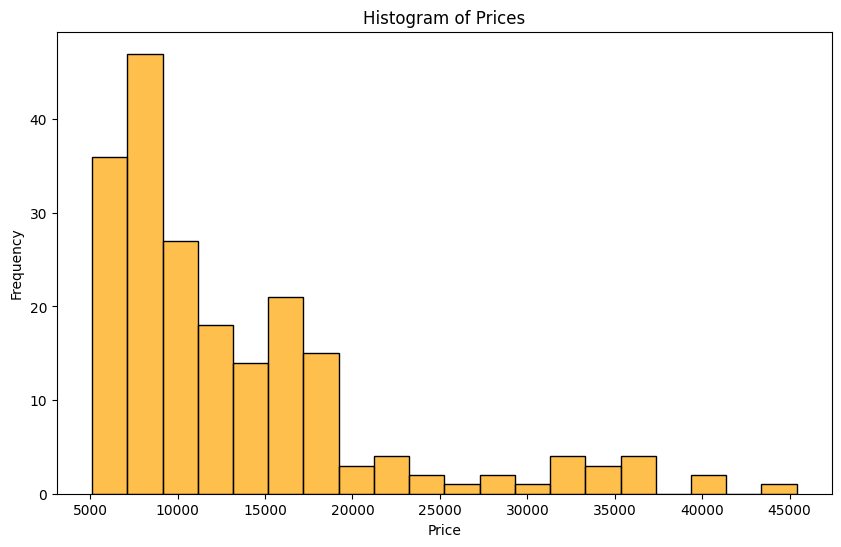

In [135]:
# Membuat histogram menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df1['price'], bins=20, color='orange', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')
plt.show()

Meskipun variabel target memiliki skewness yang miring ke kanan, saya tidak akan melakukan transformasi apapun pada variabel tersebut.

Mari lihat fitur-fitur numerik.

**Numerical Features**

In [136]:
df1[numerical].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


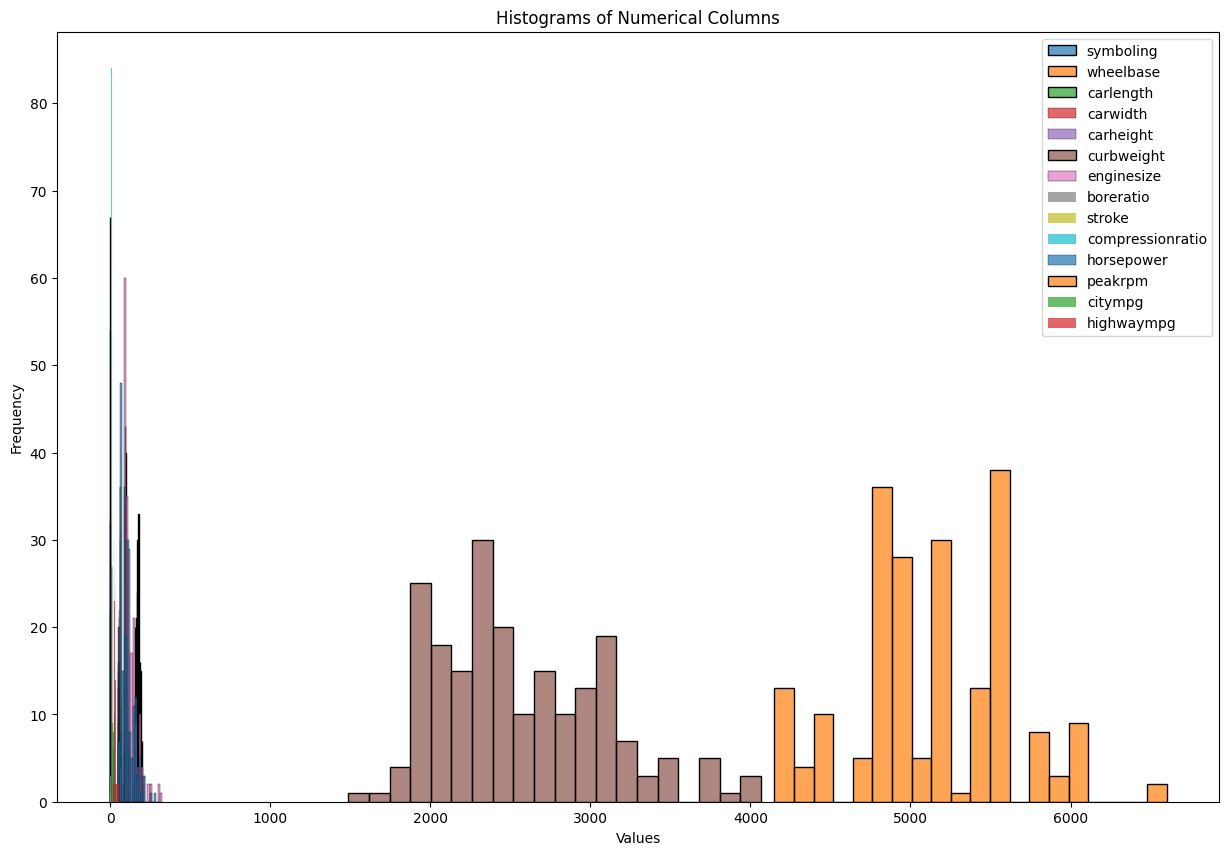

In [137]:
# Membuat histogram untuk setiap kolom numerik menggunakan seaborn
plt.figure(figsize=(15, 10))
for column in numerical:
    sns.histplot(df1[column], bins=20, alpha=0.7, label=column)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms of Numerical Columns')
plt.legend()
plt.show()

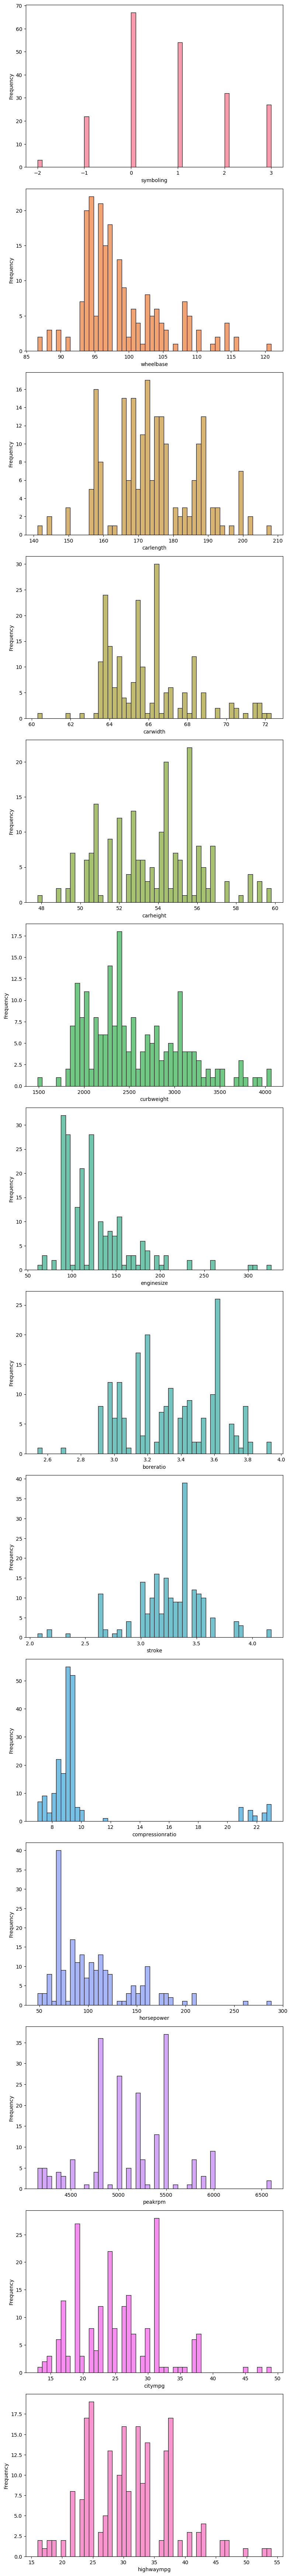

In [138]:
# Mengatur palet warna
color_palette = sns.color_palette("husl", n_colors=len(numerical))

# Mengatur ukuran dan layout subplot
fig, axes = plt.subplots(nrows=len(numerical), ncols=1, figsize=(8, 5 * len(numerical)))

# Membuat histogram untuk setiap kolom numerik menggunakan seaborn dengan warna yang berbeda
for i, column in enumerate(numerical):
    sns.histplot(df1[column], bins=50, ax=axes[i], color=color_palette[i], alpha=0.7)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Beberapa fitur memiliki distribusi yang mirip dengan distribusi normal Gaussian. Saya juga melihat adanya skewness. Saya akan memeriksa hal tersebut secara lebih detail.

In [139]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
skew_vals = df1[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

compressionratio    2.610862
enginesize          1.947655
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
dtype: float64

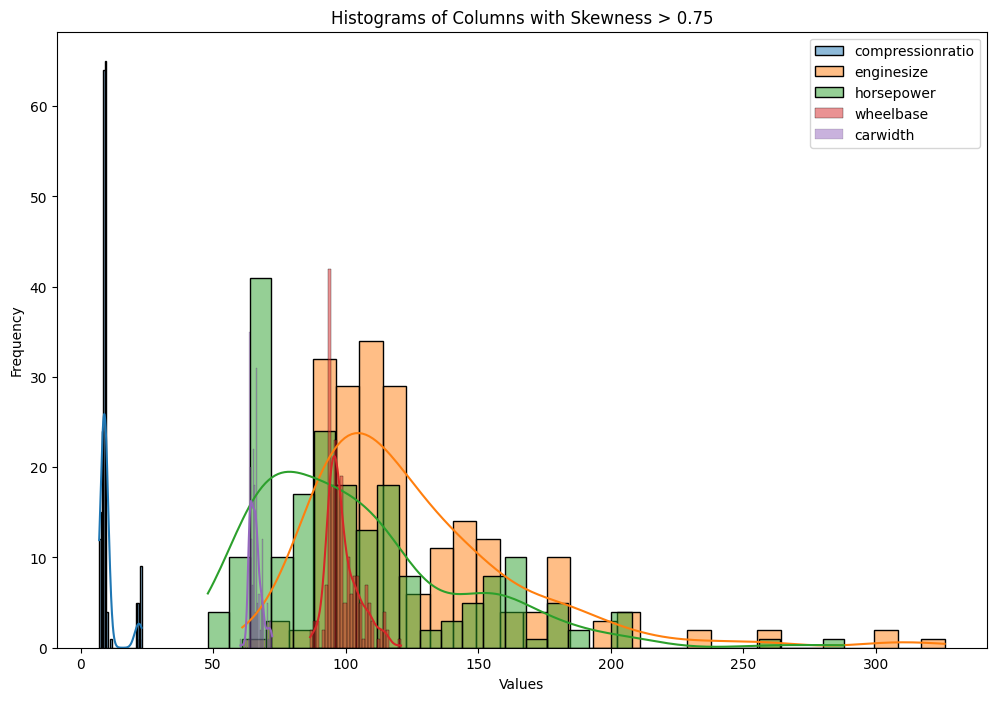

In [140]:
# Membuat histogram untuk kolom-kolom yang memiliki skewness di atas ambang batas menggunakan seaborn
plt.figure(figsize=(12, 8))
for column in skew_cols.index:
    sns.histplot(df1[column], bins=30, kde=True, label=column)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms of Columns with Skewness > {}'.format(skew_limit))
plt.legend()
plt.show()

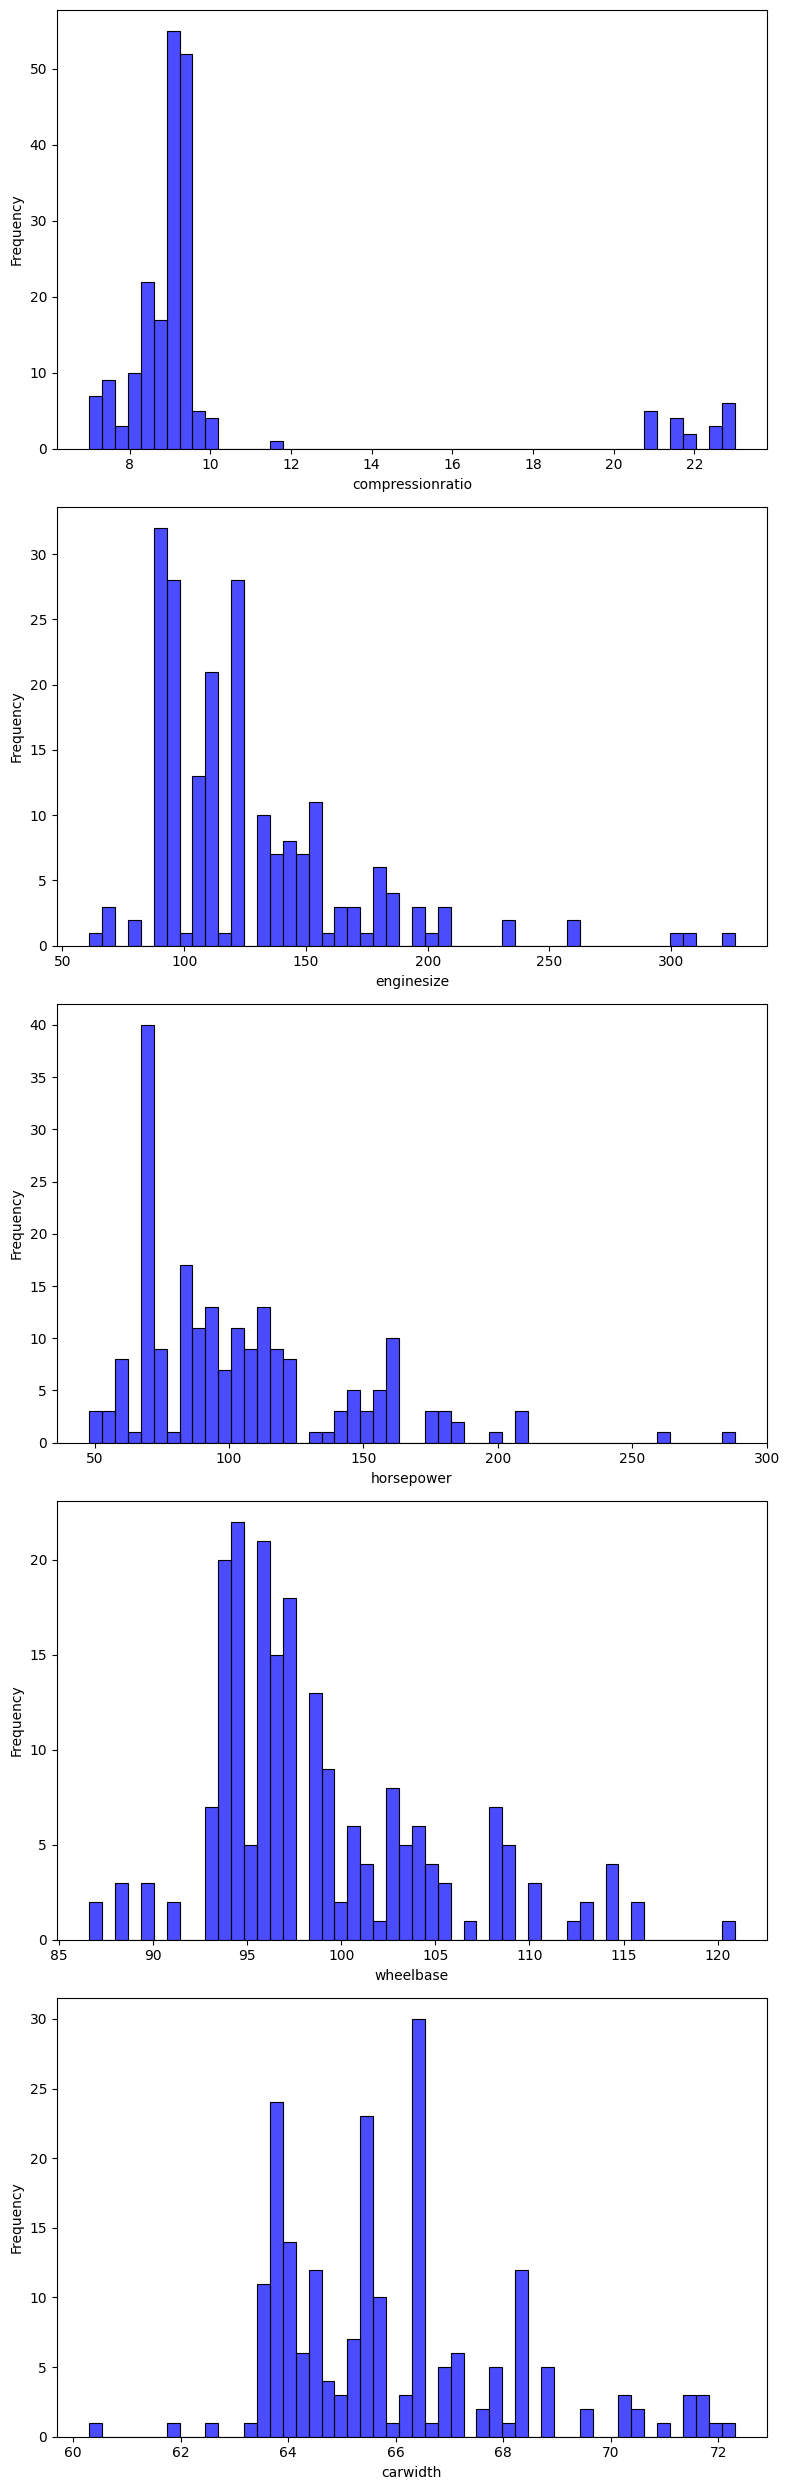

In [141]:
# Mengatur ukuran dan layout subplot
fig, axes = plt.subplots(nrows=len(skew_cols), ncols=1, figsize=(8, 5 * len(skew_cols)))

# Membuat histogram untuk setiap kolom numerik yang memiliki skewness di atas ambang batas menggunakan seaborn
for i, column in enumerate(skew_cols.index):
    sns.histplot(df1[column], bins=50, ax=axes[i], color='blue', alpha=0.7)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**With np.log**

In [142]:
df_try = df1.copy()

for col in skew_cols.index.values:
    df_try[col] = df_try[col].apply(np.log1p)

print(df_try[skew_cols.index].skew())
print()

compressionratio    2.379056
enginesize          0.864706
horsepower          0.489938
wheelbase           0.885024
carwidth            0.815331
dtype: float64



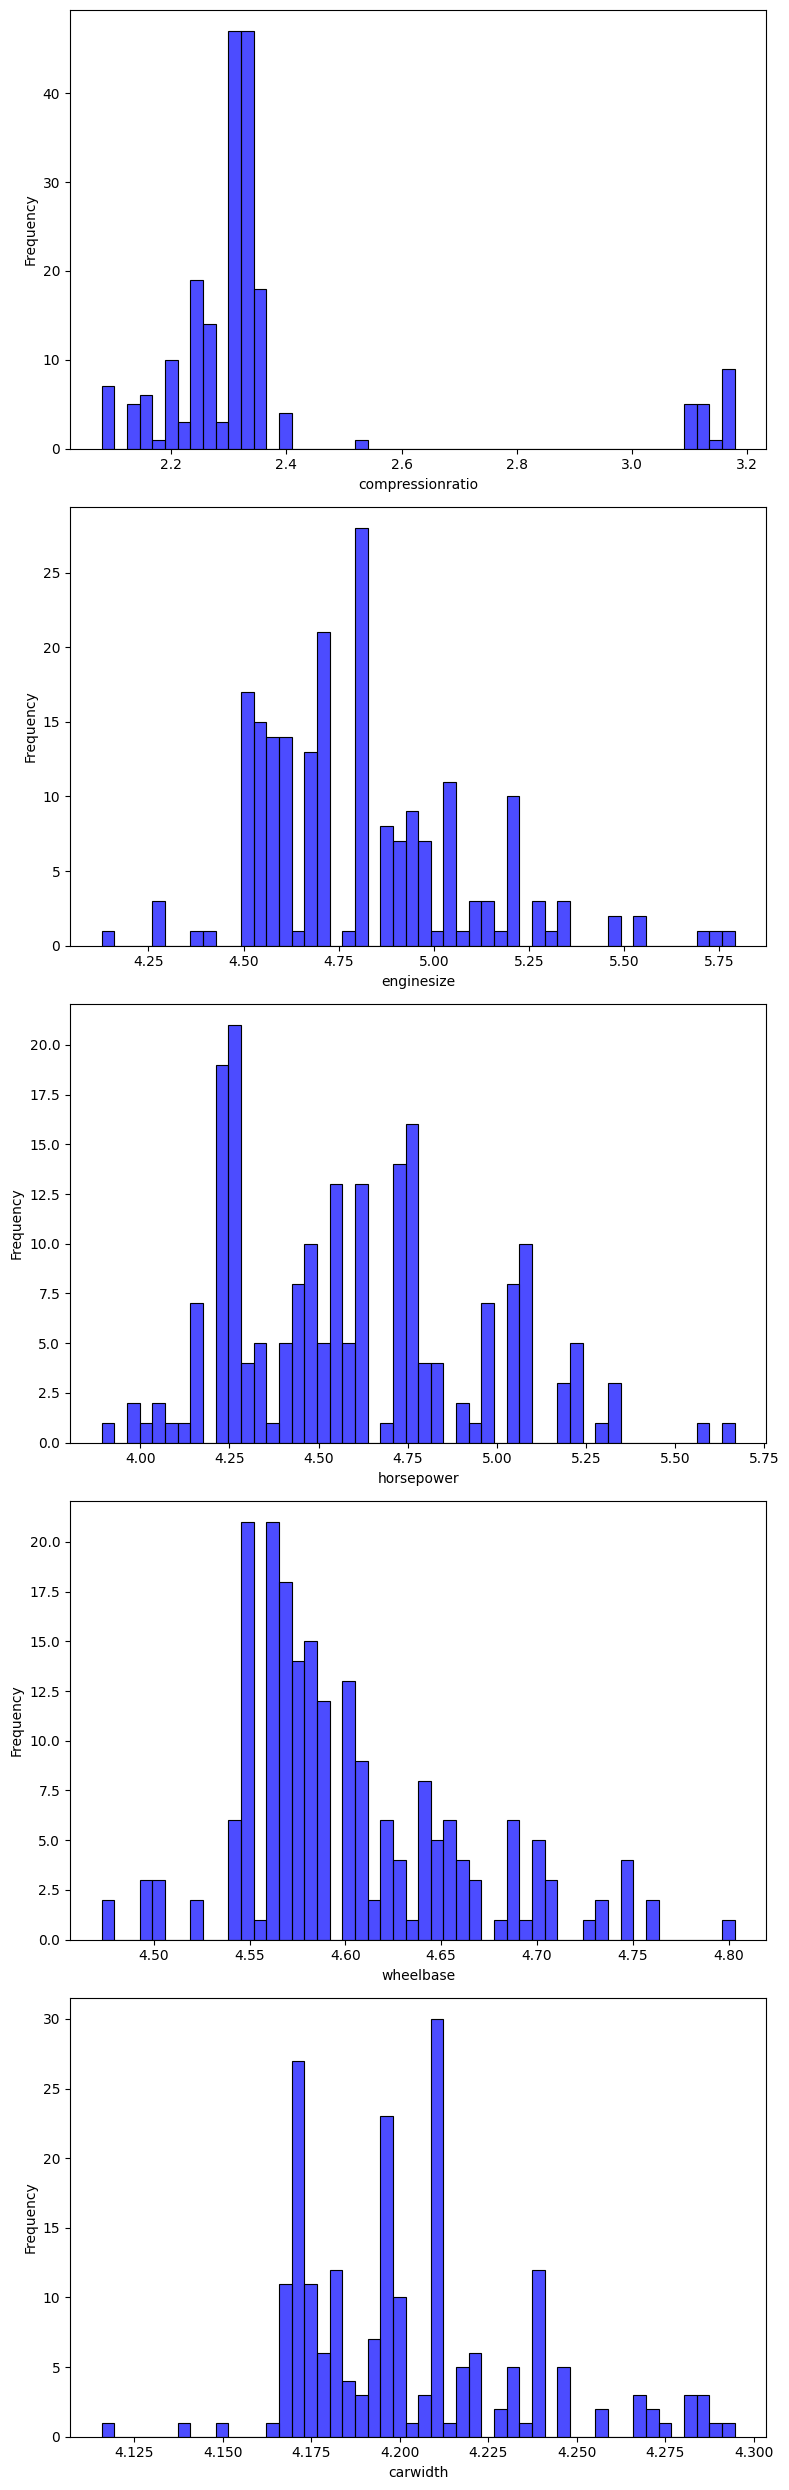

In [143]:
# Mengatur ukuran dan layout subplot
fig, axes = plt.subplots(nrows=len(skew_cols), ncols=1, figsize=(8, 5 * len(skew_cols)))

# Membuat histogram untuk setiap kolom numerik yang telah di-log-transform menggunakan seaborn
for i, column in enumerate(skew_cols.index):
    sns.histplot(df_try[column], bins=50, ax=axes[i], color='blue', alpha=0.7)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**With Power Transformer**

In [144]:
df_trans = df1[skew_cols.index].copy()
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(df_trans)
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
print(df_trans.skew())
print()

compressionratio    0.034222
enginesize         -0.002542
horsepower          0.049318
wheelbase          -0.003485
carwidth            0.000000
dtype: float64



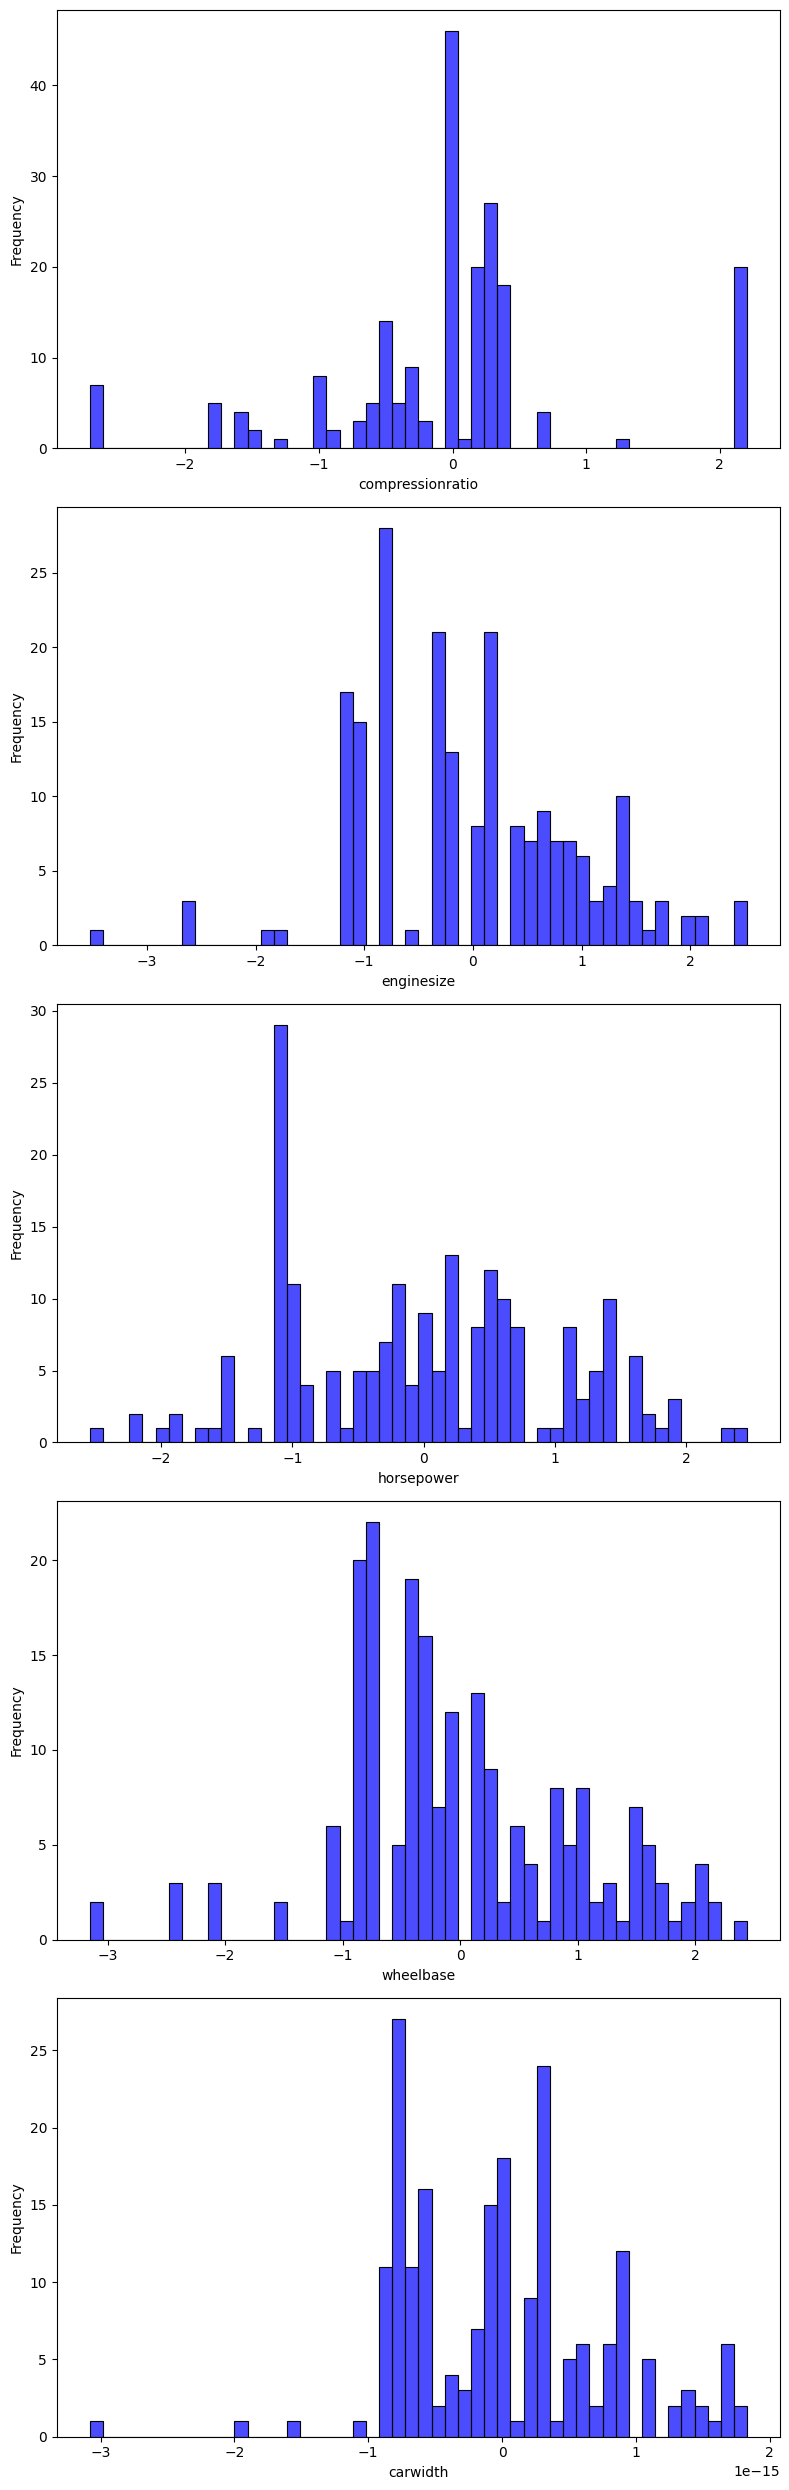

In [145]:
# Mengatur ukuran dan layout subplot
fig, axes = plt.subplots(nrows=len(skew_cols), ncols=1, figsize=(8, 5 * len(skew_cols)))

# Membuat histogram untuk setiap kolom numerik yang telah di-transform menggunakan seaborn
for i, column in enumerate(skew_cols.index):
    sns.histplot(df_trans[column], bins=50, ax=axes[i], color='blue', alpha=0.7)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Selama proses pemodelan, kita dapat menggunakan power transformer.

Mari amati korelasi di antara fitur-fitur numerik dan juga amati korelasi dengan variabel target.

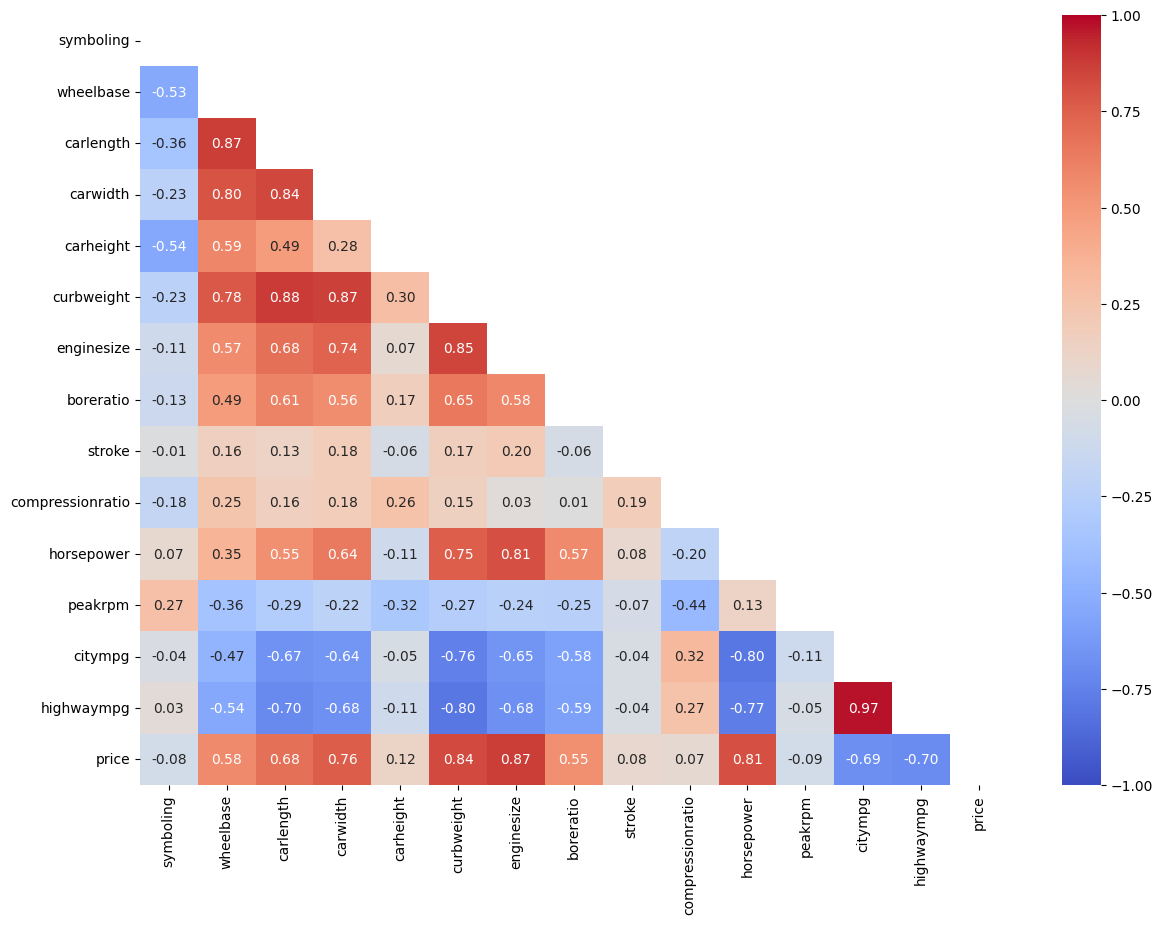

In [146]:
numerical1= df1.select_dtypes('number').columns


matrix = np.triu(df1[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap (df1[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

Kita memiliki 9 fitur numerik yang memiliki korelasi lebih dari 0,5 dengan variabel harga. Ini adalah tanda yang baik untuk kemampuan prediksi model, tetapi kita masih perlu melihatnya dalam praktik. Dari perspektif ambang batas 0,9: Highwaympg dan citympg memiliki korelasi sebesar 0,97. Kita dapat menghapus salah satunya untuk menghindari masalah multicollinearity pada model linear. Saya juga telah mengamati beberapa fitur yang sangat berkorelasi di bawah tingkat 0,9.

In [147]:
df1 = df1.drop('citympg',axis=1)

**Categorical Features**

In [148]:
df1[categorical].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,model
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


Fuel Type & Price

In [149]:
print(df1.groupby('fueltype')['price'].mean().sort_values())
print()

fueltype
gas       12999.7982
diesel    15838.1500
Name: price, dtype: float64



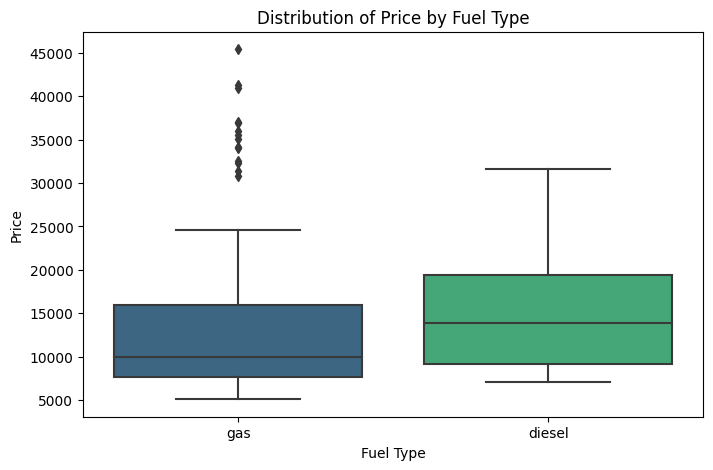

In [150]:
# Membuat boxplot distribusi harga berdasarkan jenis bahan bakar menggunakan seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(x='fueltype', y='price', data=df1, palette='viridis')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Distribution of Price by Fuel Type')
plt.show()

Aspiration & Price

In [151]:
print(df1.groupby('aspiration')['price'].mean().sort_values())
print()

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64



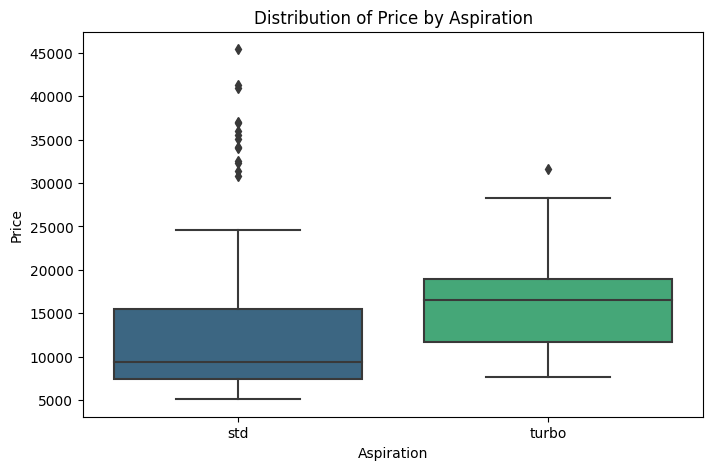

In [152]:
# Membuat boxplot distribusi harga berdasarkan aspirasi menggunakan seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(x='aspiration', y='price', data=df1, palette='viridis')
plt.xlabel('Aspiration')
plt.ylabel('Price')
plt.title('Distribution of Price by Aspiration')
plt.show()

Aspirasi turbo lebih mahal daripada aspirasi standar.







Carbody & Price

In [153]:
print(df1.groupby('carbody')['price'].mean().sort_values())
print()

carbody
hatchback      10376.652386
wagon          12371.960000
sedan          14344.270833
convertible    21890.500000
hardtop        22208.500000
Name: price, dtype: float64



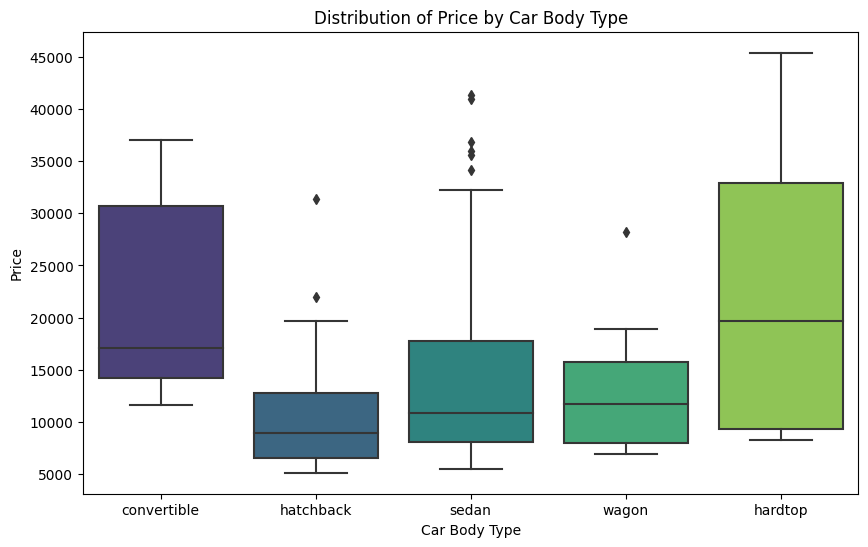

In [154]:
# Membuat boxplot distribusi harga berdasarkan tipe bodi mobil menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='carbody', y='price', data=df1, palette='viridis')
plt.xlabel('Car Body Type')
plt.ylabel('Price')
plt.title('Distribution of Price by Car Body Type')
plt.show()

Berdasarkan harga, terdapat perbedaan di antara jenis carbody. Mobil berjenis Wagon merupakan yang paling murah, sedangkan hardtop dan convertible merupakan yang paling mahal.

Drivewheel & Price

In [155]:
print(df1.groupby('drivewheel')['price'].mean().sort_values())
print()

drivewheel
fwd     9239.308333
4wd    11087.463000
rwd    19910.809211
Name: price, dtype: float64



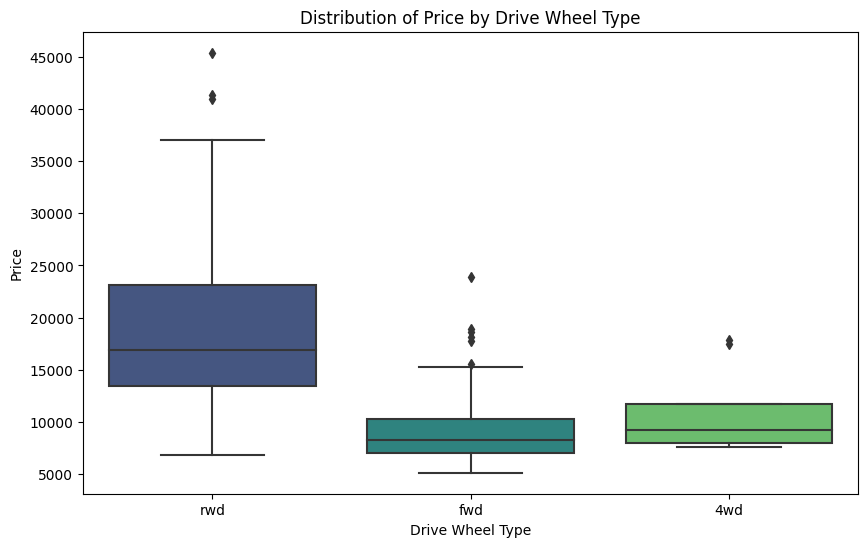

In [156]:
# Membuat boxplot distribusi harga berdasarkan tipe roda penggerak menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='drivewheel', y='price', data=df1, palette='viridis')
plt.xlabel('Drive Wheel Type')
plt.ylabel('Price')
plt.title('Distribution of Price by Drive Wheel Type')
plt.show()

Mobil dengan penggerak roda belakang adalah yang paling mahal, sementara mobil dengan penggerak roda depan adalah yang paling murah.

Engine location & Price

In [157]:
print(df1.groupby('enginelocation')['price'].mean().sort_values())
print()

enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64



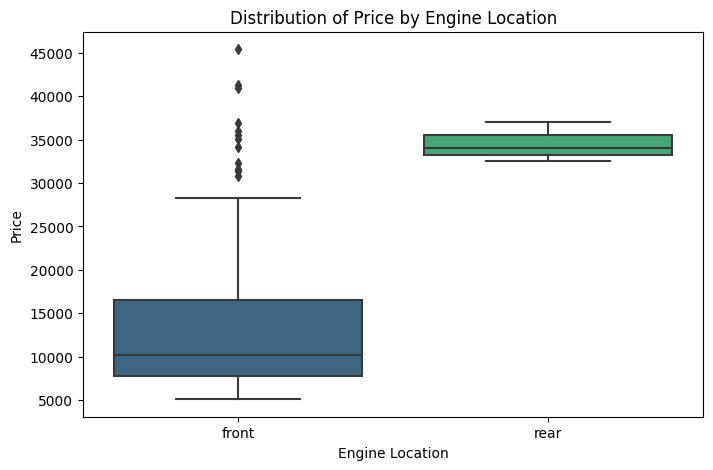

In [158]:
# Membuat boxplot distribusi harga berdasarkan lokasi mesin menggunakan seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(x='enginelocation', y='price', data=df1, palette='viridis')
plt.xlabel('Engine Location')
plt.ylabel('Price')
plt.title('Distribution of Price by Engine Location')
plt.show()

Terdapat perbedaan yang cukup signifikan berdasarkan lokasi mesin. Mobil dengan mesin di bagian belakang hampir 3 kali lebih mahal dibandingkan dengan yang berlokasi di bagian depan.

Engine type & Price

In [159]:
print(df1.groupby('enginetype')['price'].mean().sort_values())
print()

enginetype
ohc      11574.048426
rotor    13020.000000
ohcf     13738.600000
l        14627.583333
dohc     18116.416667
ohcv     25098.384615
dohcv    31400.500000
Name: price, dtype: float64



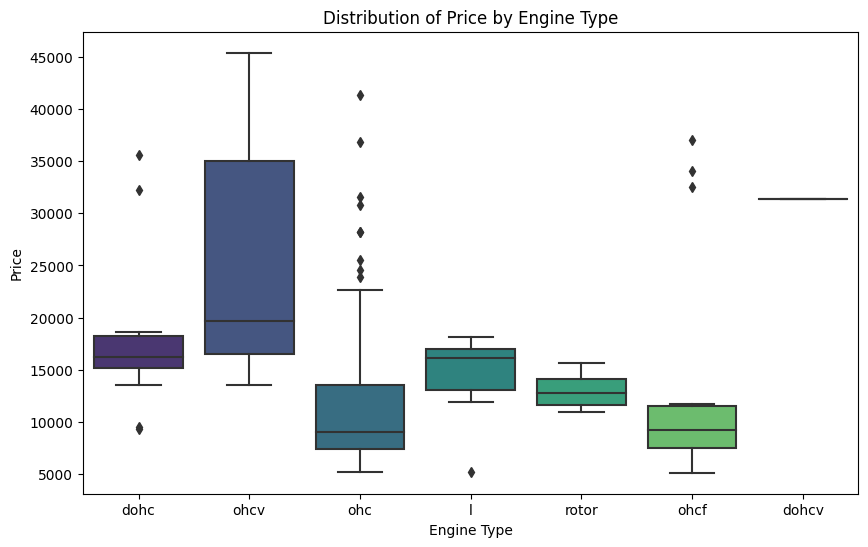

In [160]:
# Membuat boxplot distribusi harga berdasarkan jenis mesin menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='enginetype', y='price', data=df1, palette='viridis')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.title('Distribution of Price by Engine Type')
plt.show()

Dataset kita memiliki 7 jenis mesin yang berbeda dan perubahan harga di antara mereka signifikan.

Fuel system & Price

In [161]:
print(df1.groupby('fuelsystem')['price'].mean().sort_values())
print()

fuelsystem
2bbl     7478.151515
1bbl     7555.545455
spdi    10990.444444
spfi    11048.000000
4bbl    12145.000000
mfi     12964.000000
idi     15838.150000
mpfi    17754.602840
Name: price, dtype: float64



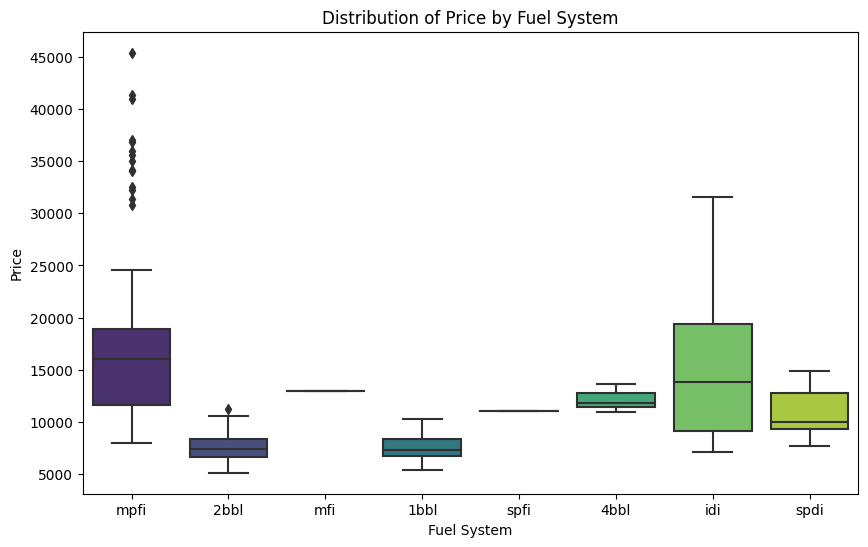

In [162]:
# Membuat boxplot distribusi harga berdasarkan sistem bahan bakar menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuelsystem', y='price', data=df1, palette='viridis')
plt.xlabel('Fuel System')
plt.ylabel('Price')
plt.title('Distribution of Price by Fuel System')
plt.show()

Dataset kita memiliki 8 sistem bahan bakar yang berbeda dan perubahan harga di antara mereka signifikan.

Model & Price

In [163]:
print(df1.groupby('model')['price'].mean().sort_values())
print()

model
chevrolet       6007.000000
dodge           7875.444444
plymouth        7963.428571
honda           8184.692308
subaru          8541.250000
isuzu           8916.500000
mitsubishi      9239.769231
renault         9595.000000
Toyota          9885.812500
Volkswagen     10077.500000
Nissan         10415.666667
Mazda          10652.882353
saab           15223.333333
peugeot        15489.090909
alfa-romero    15498.333333
mercury        16503.000000
audi           17859.166714
volvo          18063.181818
bmw            26118.750000
Porsche        31400.500000
buick          33647.000000
jaguar         34600.000000
Name: price, dtype: float64



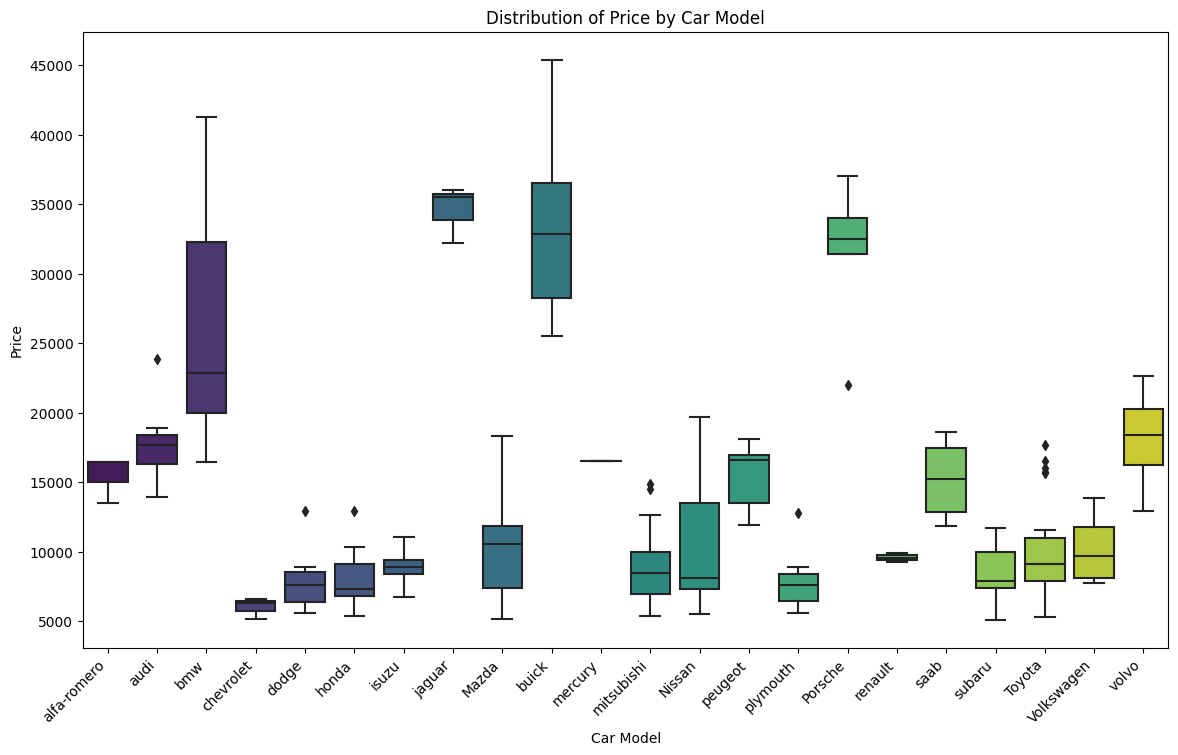

In [164]:
# Membuat boxplot distribusi harga berdasarkan model mobil menggunakan seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(x='model', y='price', data=df1, palette='viridis')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.title('Distribution of Price by Car Model')
plt.xticks(rotation=45, ha='right')  # Rotasi label agar lebih mudah dibaca
plt.show()

Berdasarkan model, Porsche, Buick, dan Jaguar adalah model yang paling mahal. Sedangkan Chevrolet merupakan model yang paling murah.

Get the Dummies

In [165]:
df2 = pd.get_dummies(df1, columns=categorical, drop_first=True)
df2.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,model_Nissan,model_Porsche,model_Toyota,model_Volkswagen,model_alfa-romero,model_audi,model_bmw,model_buick,model_chevrolet,model_dodge,model_honda,model_isuzu,model_jaguar,model_mercury,model_mitsubishi,model_peugeot,model_plymouth,model_renault,model_saab,model_subaru,model_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,22,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# MODEL SELECTION

Saya akan menggunakan model regresi linear sebagai model dasar, kemudian saya akan menggunakan Ridge, Lasso, Elasticnet, KNeighborsRegressor, dan Support Vector Machine Regressor. Selanjutnya, saya akan menggunakan model ensemble, seperti Random Forest, Gradient Boosting, dan Extra Trees. Terakhir, saya akan melihat XGBoost Regresson. Setelah mengevaluasi algoritma, kita akan memilih model terbaik. Mari kita mulai.

Model Dasar

In [180]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [181]:
model = LinearRegression()

In [182]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [183]:
print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')

model : LinearRegression() and  rmse score is : 2614.8935998482707, r2 score is 0.9133858592159779


Model Dasar, dalam hal ini, model Regresi Linear, tanpa skalasi dan transformasi, memberikan performa yang cukup baik.

Ridge & Lasso & Elasticnet & KNN with Scaler and Transformer

In [184]:
rmse_test =[]
r2_test =[]
model_names =[]

numerical2= df2.drop(['price'], axis=1).select_dtypes('number').columns

X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge() and  rmse score is : 2358.04, r2 score is 0.93
model : Lasso() and  rmse score is : 2468.49, r2 score is 0.92
model : ElasticNet() and  rmse score is : 3310.61, r2 score is 0.86
model : KNeighborsRegressor() and  rmse score is : 4060.19, r2 score is 0.79


,RMSE,R2_Test
Ridge,2358.04,0.93
Lasso,2468.49,0.92
ElasticNet,3310.61,0.86
KNeighbors,4060.19,0.79


Dengan menggunakan standar scaler dan power transformer untuk menangani skewness, pada model-model linear kita mendapatkan nilai R2 sebesar 0.93 dan RMSE sebesar 2358.04, yang merupakan skor yang lebih baik dibandingkan dengan model dasar.

Random Forest& Gradient Boosting & Extra Trees & XGBoost

In [189]:
rmse_test = []
r2_test = []
model_names = []

X = df2.drop('price', axis=1)
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et = ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rf, gb, et, xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
    r2_test.append(round(r2_score(y_test, y_pred), 4))
    print(f'model: {model} and rmse score is: {round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)}, r2 score is {r2_score(y_test, y_pred):.4f}')

model_names = ['RandomForest', 'GradientBoost', 'ExtraTree', 'XGB']
result_df = pd.DataFrame({'RMSE': rmse_test, 'R2_Test': r2_test}, index=model_names)
result_df


model: RandomForestRegressor(random_state=42) and rmse score is: 1813.48, r2 score is 0.9583
model: GradientBoostingRegressor(random_state=42) and rmse score is: 2437.1, r2 score is 0.9248
model: ExtraTreesRegressor(random_state=42) and rmse score is: 2544.28, r2 score is 0.9180
model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_t

,RMSE,R2_Test
RandomForest,1813.48,0.9583
GradientBoost,2437.10,0.9248
ExtraTree,2544.28,0.9180
XGB,2214.70,0.9379


Sekarang kita sedang membicarakannya. Random Forest, tanpa penyetelan apa pun, mendapatkan R2 sebesar 0,96 dan RMSE terendah. XGBoost juga memberikan hasil yang baik tanpa adanya optimasi/tuning.

Best Model with the Hyperparameter Tuning

In [186]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators= 220, random_state=42 )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

 rmse score is : 1812.2707, r2 score is 0.9584


Dengan penyetelan hiperparameter, kita mendapatkan peningkatan.
RMSE (dari 1813.48 menjadi 1812.2707)
R2 (dari 0.9583 menjadi 0.9584)